In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (5, 2)
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.unicode_minus'] = False

import glob
fn_list = glob.glob('./*.csv')
fn_list = [fn.replace('\\', '/') for fn in fn_list]
fn_list

['./ambiguous_drift_J.csv',
 './ambiguous_trend_J.csv',
 './Drift_J.csv',
 './Minor_J.csv',
 './Outlier_J.csv',
 './Square_J.csv',
 './Trend_J.csv']

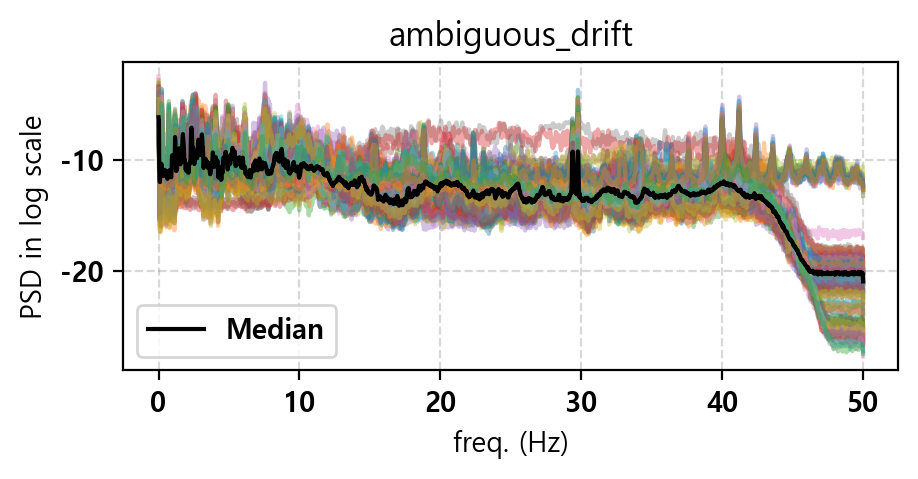

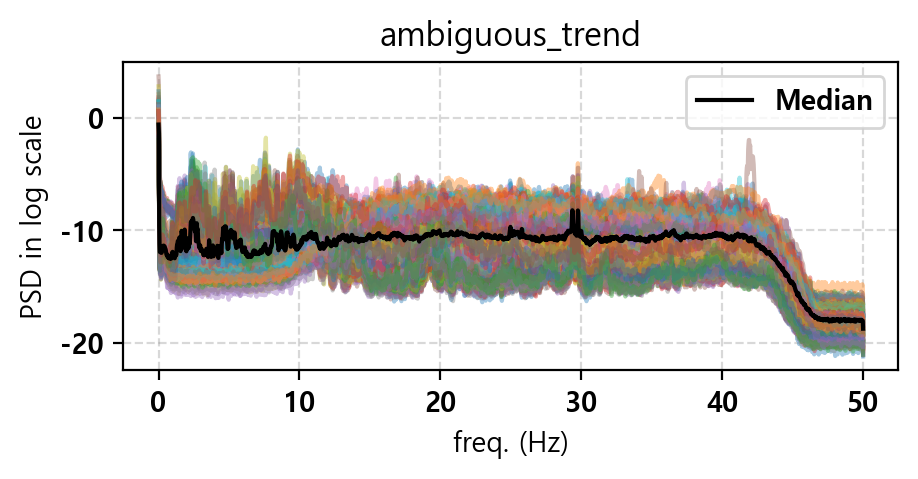

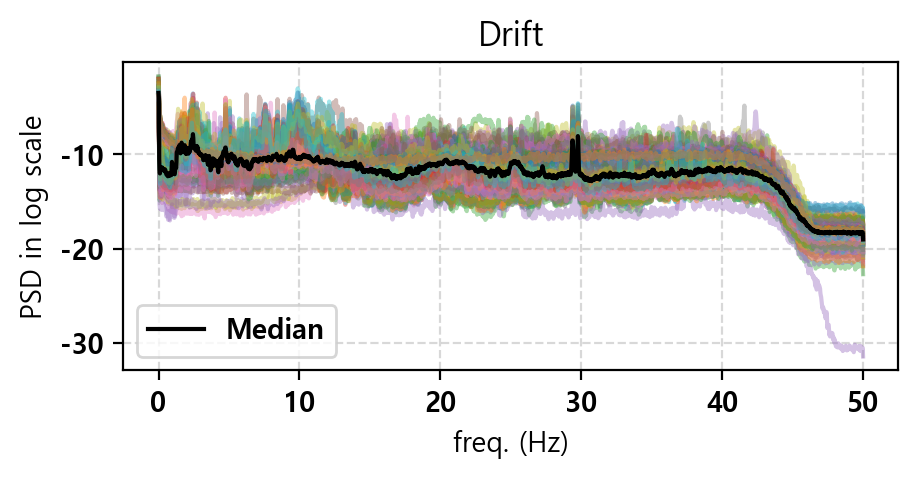

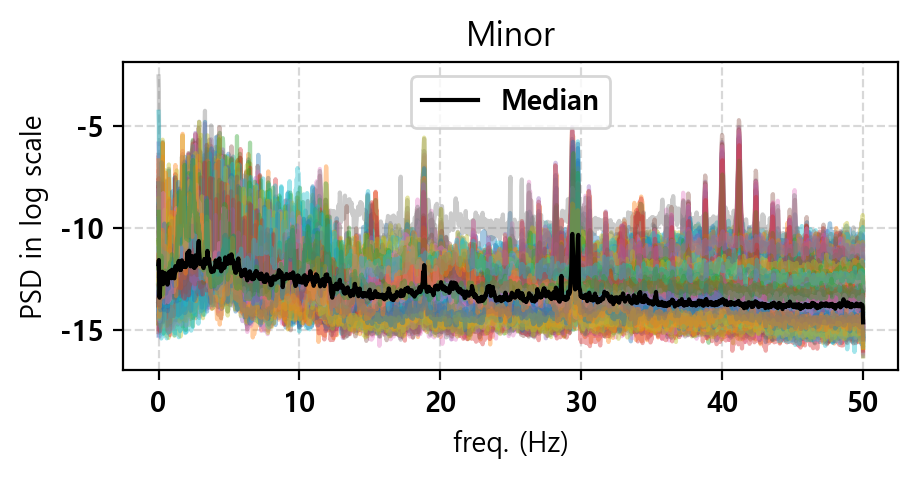

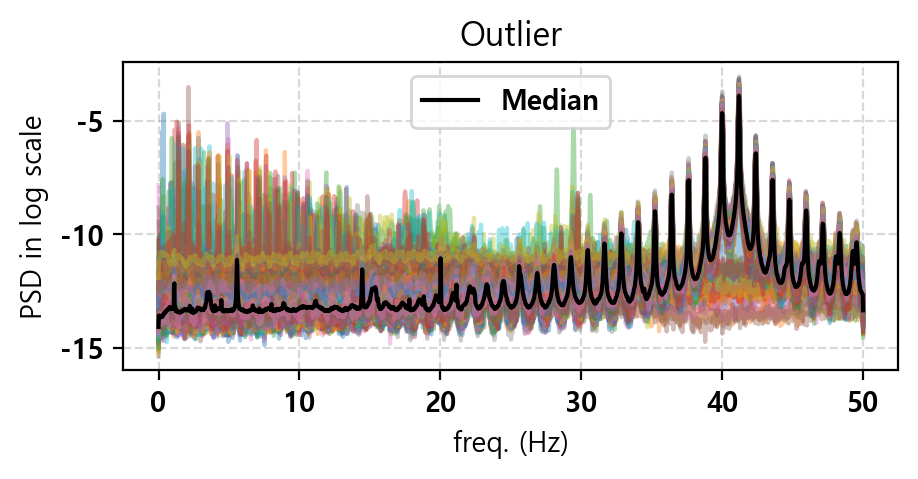

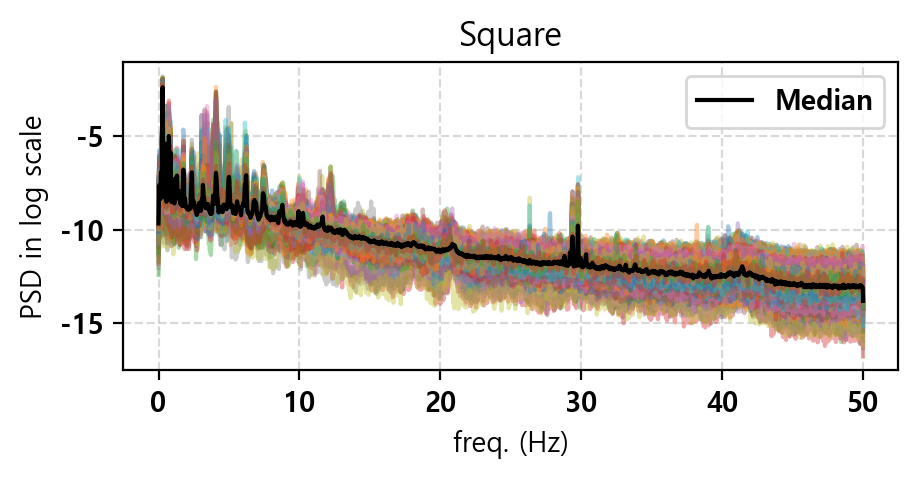

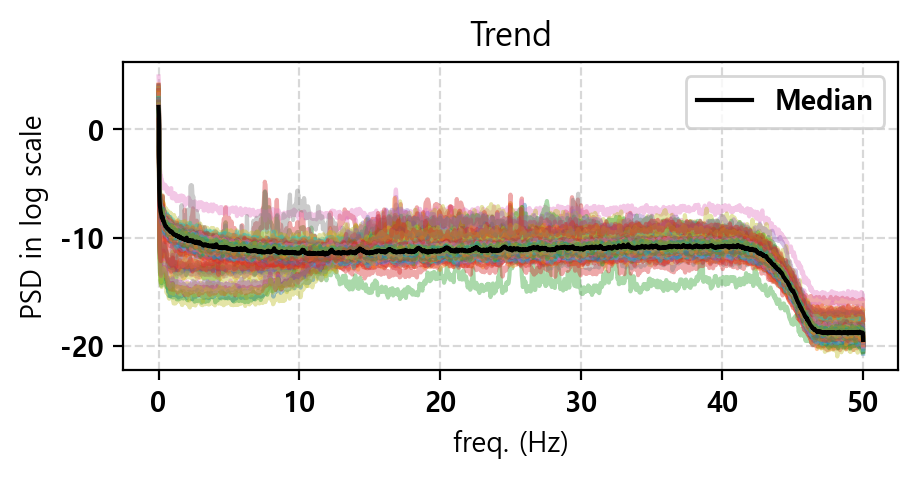

In [35]:
for fn in fn_list:
    df_raw = pd.read_csv(fn, index_col=0)
    freq = df_raw.index.values
    PSD = np.log(df_raw.values)

    df = pd.DataFrame(PSD, index = freq)
    fn_type = fn.split("/")[-1][:-6]

    # plt.plot(freq, df.iloc[:, 0], alpha=0.4)
    # plt.plot(freq, df.iloc[:, -1], alpha=0.4)
    plt.plot(freq, df, alpha=0.4)
    plt.plot(freq, np.median(df.values, axis = 1), color = 'k', label = 'Median')
    plt.title(fn_type)
    plt.grid(color='gray', alpha=0.3, linestyle='--')
    plt.xlabel('freq. (Hz)')
    plt.ylabel('PSD in log scale')
    plt.legend()
    plt.show()

    df.to_csv('../' + fn_type + '.csv')
